 Member Names from CVPR Sec: B                                         Controbutions

1. Nasin Ayenul Akash-17-35060-2--->             60% this particular code below
2. Md. Shakibul Alam – 18-36556-1--->            40% individual implementation which achieved achieved 91% accuracy 
3. Ismail,MD.Fahad Bin - 18-38641-3--->          0%
4. Ariful  Islam -18-37545-1--->                 0%



In [1]:
import os
import cv2
import glob as gb
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import seaborn as sns
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
TRAIN_DIR='/content/drive/MyDrive/Datasets/Chest Xray for covid-19 detection/Train'
VAL_DIR='/content/drive/MyDrive/Datasets/Chest Xray for covid-19 detection/Val'
TEST_DIR='/content/drive/MyDrive/Datasets/Chest Xray for covid-19 detection/Prediction'


In [4]:
IMG_SIZE=160
BATCH_SIZE=32
SEED=1000

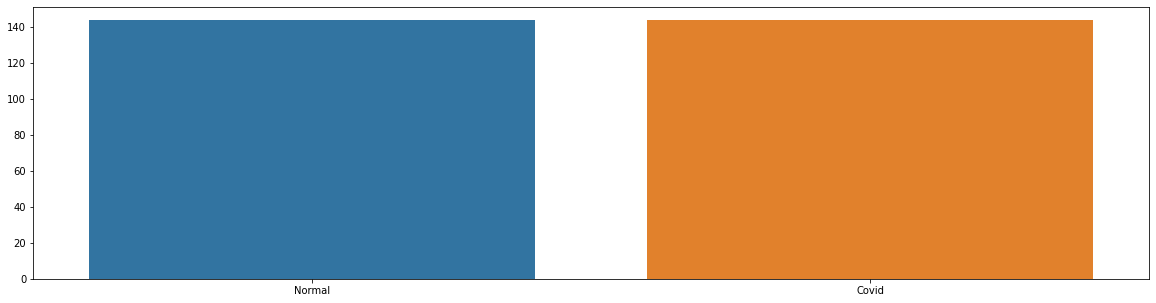

['Normal', 'Covid']
[144, 144]
288


In [5]:
class_names=[]
class_count=[]
train_examples=0
for f in os.listdir(TRAIN_DIR):
  #print(f)
  files=gb.glob(pathname=str(TRAIN_DIR + "/" + f +"/*"))
  class_names.append(f)
  class_count.append(len(files))
  train_examples += len(files)

plt.figure(figsize=(20,5))
sns.barplot(x=class_names, y=class_count)
plt.show()
print(class_names)
print(class_count)
print(train_examples)

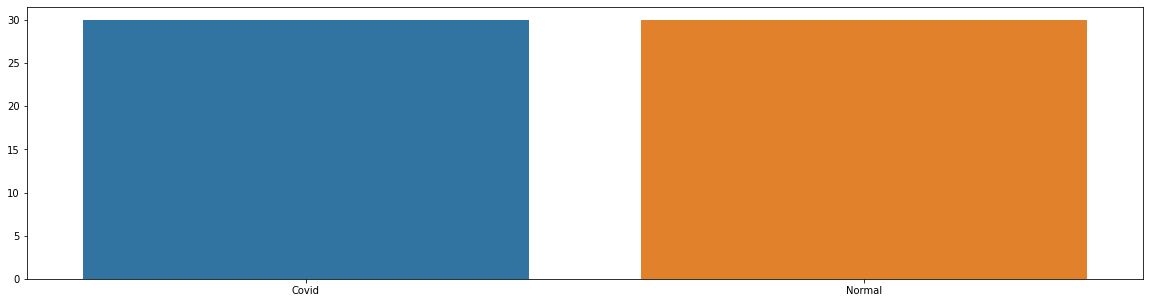

['Covid', 'Normal']
[30, 30]
60


In [6]:
class_names=[]
class_count=[]
val_examples=0
for f in os.listdir(VAL_DIR):
  #print(f)
  files=gb.glob(pathname=str(VAL_DIR + "/" + f +"/*"))
  class_names.append(f)
  class_count.append(len(files))
  val_examples += len(files)

plt.figure(figsize=(20,5))
sns.barplot(x=class_names, y=class_count)
plt.show()
print(class_names)
print(class_count)
print(val_examples)

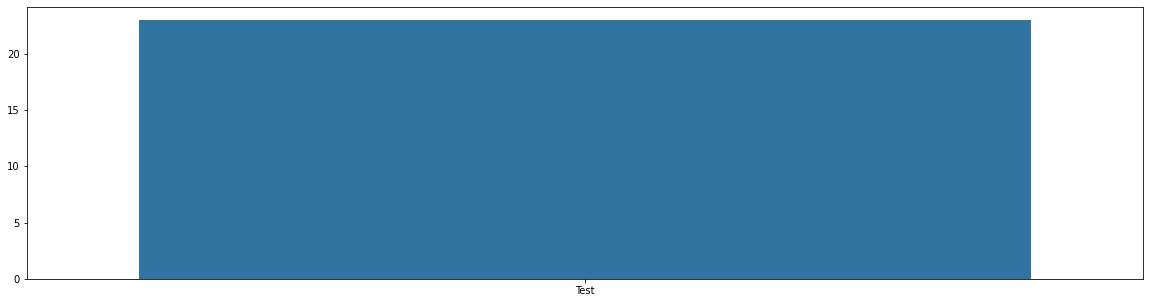

['Test']
[23]
23


In [7]:
class_names=[]
class_count=[]
val_examples=0
for f in os.listdir(TEST_DIR):
  #print(f)
  files=gb.glob(pathname=str(TEST_DIR + "/" + f +"/*"))
  class_names.append(f)
  class_count.append(len(files))
  val_examples += len(files)

plt.figure(figsize=(20,5))
sns.barplot(x=class_names, y=class_count)
plt.show()
print(class_names)
print(class_count)
print(val_examples)

In [8]:
CATEGORIES=[]
for c in os.listdir(TRAIN_DIR):
    #print(c)
    CATEGORIES.append(c)

print(CATEGORIES)

['Normal', 'Covid']


  6%|▋         | 9/144 [00:02<00:33,  4.04it/s]


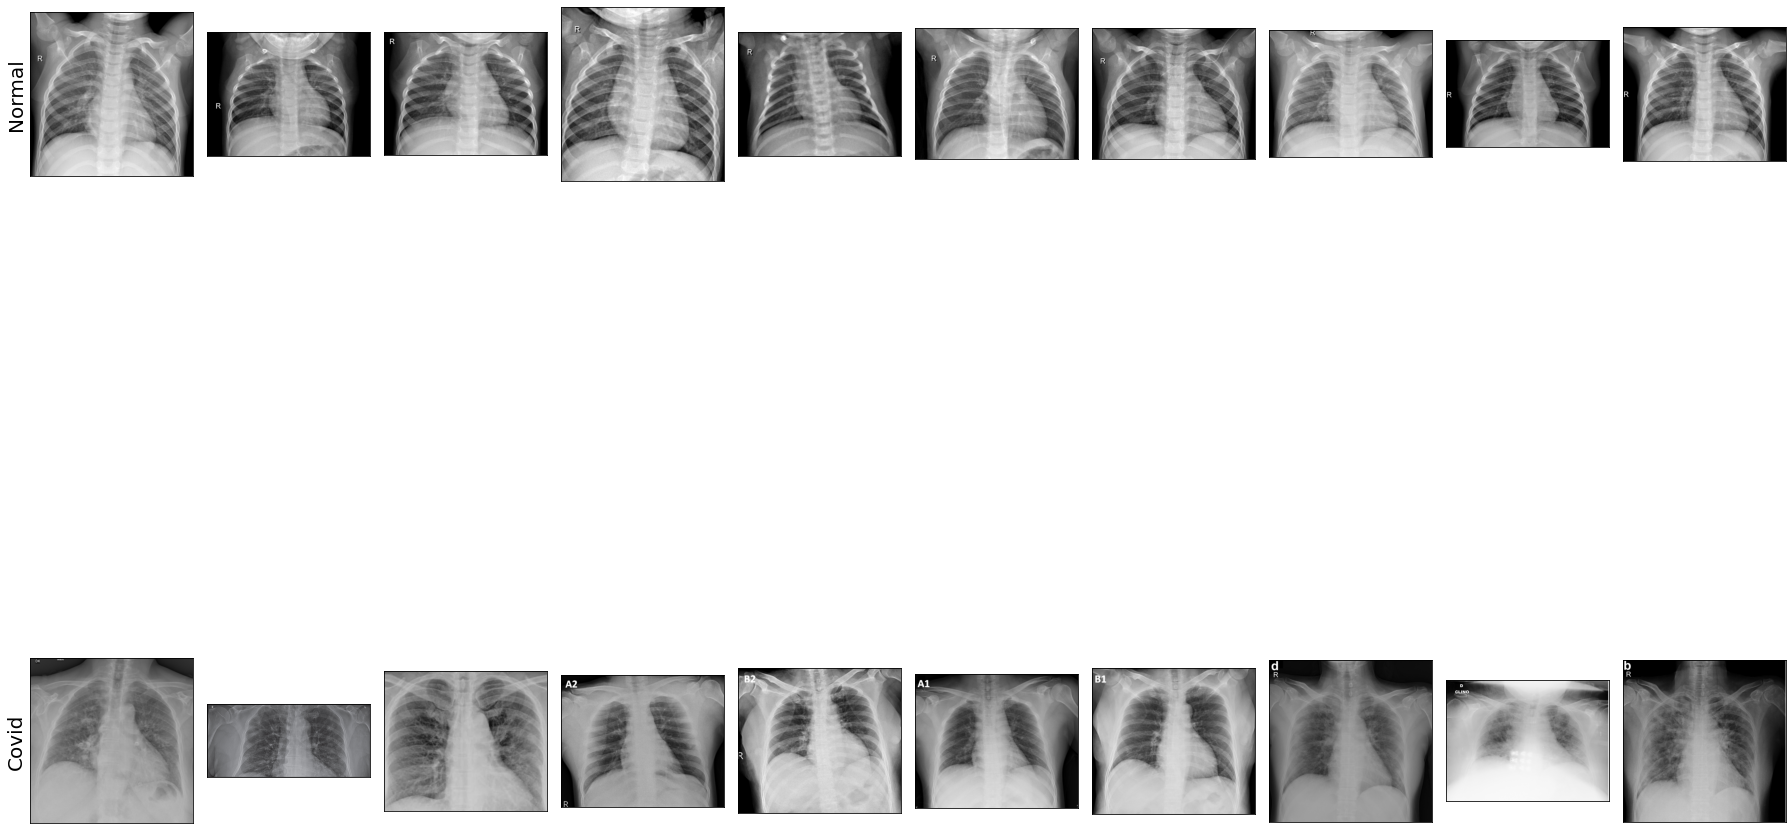

In [9]:
plt.figure(figsize=(25,25))
tmp=0
for c in CATEGORIES:
    path=os.path.join(TRAIN_DIR,c)
    #print(path)
    for img in tqdm(os.listdir(path)):
        img_arr=cv2.cvtColor( cv2.imread(os.path.join(path,img)),cv2.COLOR_BGR2RGB)
        #print(img)
        plt.subplot(2,10,tmp+1)
        plt.imshow(img_arr)
        plt.xticks([])
        plt.yticks([])
        if tmp%10==0:
          plt.ylabel(c, color='black', fontsize=20)
        tmp+=1
        if tmp%10==0:
          break;

plt.tight_layout()
plt.show()

In [10]:
train_dataset = tf.keras.utils.image_dataset_from_directory(TRAIN_DIR,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=(IMG_SIZE,IMG_SIZE))

Found 288 files belonging to 2 classes.


In [11]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(VAL_DIR,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=(IMG_SIZE,IMG_SIZE))

Found 60 files belonging to 2 classes.


In [12]:
print(type(validation_dataset))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [13]:
# path=TEST_DIR
# test_dataset=[]

# for image in tqdm(os.listdir(path)):
#   img_arr=cv2.imread(os.path.join(path,image))
#   img_resized=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
#   test_dataset.append(img_resized)

# print()
# print(len(test_dataset))
# random.shuffle(test_dataset)


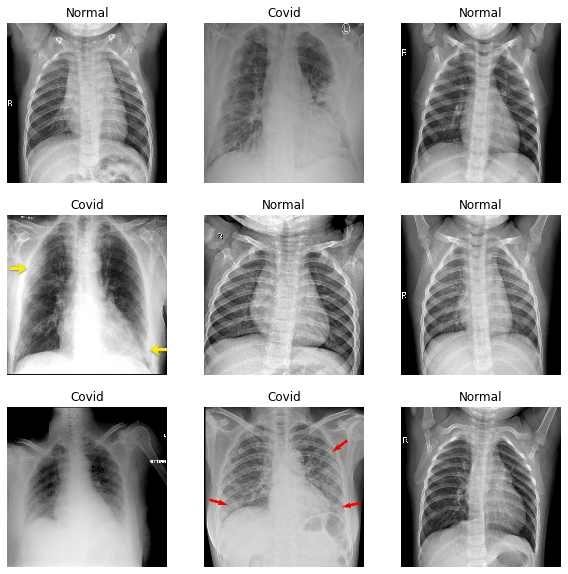

In [14]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)


In [16]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2)
  
])

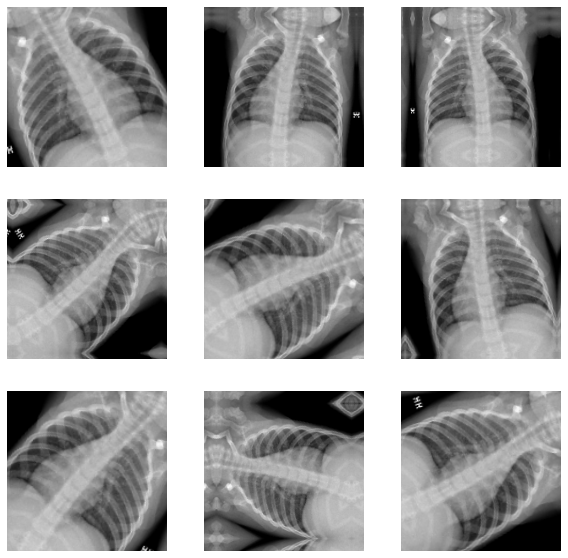

In [17]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [18]:
IMG_SHAPE = (IMG_SIZE,IMG_SIZE) + (3,)##########################################
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

94781440/94765736 [==============================] - 1s 0us/step


In [19]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 166, 166, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 80, 80, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 80, 80, 64)   256         ['conv1_conv[0][0]']      

In [20]:
base_model.trainable=False

In [21]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.resnet50.preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(256,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.BatchNormalization()(x)
outputs = tf.keras.layers.Dense(2,activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 160, 160, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 160, 160, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                      

In [23]:
base_lr = 0.0001

In [24]:
model.compile(
              optimizer=tf.keras.optimizers.Adam(learning_rate=base_lr),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
              
              )

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
cb = EarlyStopping(monitor='val_loss', min_delta=0.02, patience=5, restore_best_weights=True)

h = model.fit(train_dataset,
              epochs=20,
              validation_data=validation_dataset,
              callbacks=[cb]
              )

Epoch 1/20
9/9 [==============================] - 27s 1s/step - loss: 0.8377 - accuracy: 0.5868 - val_loss: 0.7835 - val_accuracy: 0.4833
Epoch 2/20
9/9 [==============================] - 6s 321ms/step - loss: 0.3337 - accuracy: 0.8750 - val_loss: 0.4544 - val_accuracy: 0.7667
Epoch 3/20
9/9 [==============================] - 6s 320ms/step - loss: 0.2370 - accuracy: 0.9167 - val_loss: 0.2975 - val_accuracy: 0.9167
Epoch 4/20
9/9 [==============================] - 6s 317ms/step - loss: 0.1591 - accuracy: 0.9479 - val_loss: 0.2278 - val_accuracy: 0.9333
Epoch 5/20
9/9 [==============================] - 7s 329ms/step - loss: 0.1668 - accuracy: 0.9479 - val_loss: 0.1905 - val_accuracy: 0.9333
Epoch 6/20
9/9 [==============================] - 6s 324ms/step - loss: 0.1419 - accuracy: 0.9514 - val_loss: 0.1622 - val_accuracy: 0.9333
Epoch 7/20
9/9 [==============================] - 6s 319ms/step - loss: 0.0833 - accuracy: 0.9722 - val_loss: 0.1400 - val_accuracy: 0.9500
Epoch 8/20
9/9 [======

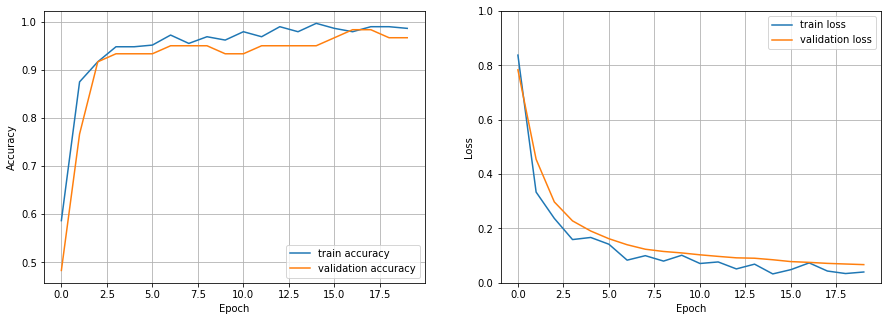

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'],  label='train accuracy')
plt.plot(h.history['val_accuracy'],  label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'],  label='train loss')
plt.plot(h.history['val_loss'],  label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.ylim([0,1])
plt.legend(loc='upper right')

plt.show()


 Loss And Accuracy 



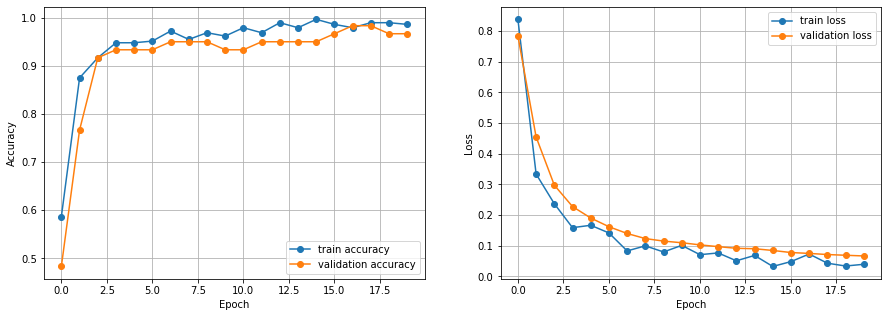

In [28]:
#ploting the accuracy and loss:


print("\n Loss And Accuracy \n")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')


plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()



In [29]:
#from keras.models import Model
#from tensorflow.keras.preprocessing.image import img_to_array,load_img

In [30]:
#model.layers[0].get_config()
# model.layers[1].get_config()

In [31]:
test_dataset = tf.keras.utils.image_dataset_from_directory(TEST_DIR,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=(IMG_SIZE,IMG_SIZE))

Found 23 files belonging to 1 classes.


In [32]:
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
import imageio


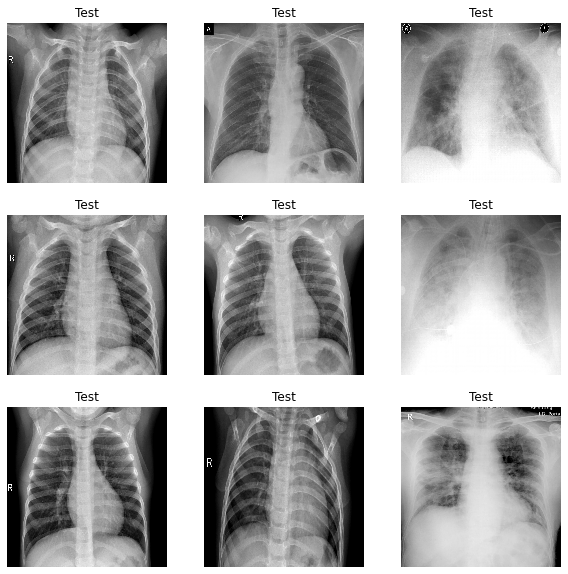

In [33]:
class_names = test_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in test_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



In [34]:
images[0].shape

TensorShape([160, 160, 3])

In [35]:
# i=0
# for layer in model.layers:
# 	if 'conv' not in layer.name:
# 		continue
# 	print(layer.name)

In [89]:
# import cv2
img=images[0]
img=np.resize(img,(1,IMG_SIZE,IMG_SIZE,3))
# img.shape
# img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
img.shape

(1, 160, 160, 3)

In [37]:
img.shape

(1, 160, 160, 3)

In [38]:
prep_input=preprocess_input(img)

prep_input=np.abs(prep_input)
#plt.imshow(prep_input.astype("uint8"))

In [39]:
prep_input

array([[[[ 13.004631 ,  25.844627 ,  32.74563  ],
         [ 21.390999 ,  34.230995 ,  41.131996 ],
         [ 21.067032 ,  33.90703  ,  40.80803  ],
         ...,
         [ 76.30463  ,  89.14462  ,  96.04562  ],
         [ 78.30463  ,  91.14462  ,  98.04562  ],
         [ 81.30463  ,  94.14462  , 101.04562  ]],

        [[ 30.957878 ,  18.117882 ,  11.216881 ],
         [ 21.493675 ,   8.653679 ,   1.7526779],
         [  9.576622 ,   3.2633743,  10.164375 ],
         ...,
         [ 72.85434  ,  85.694336 ,  92.59534  ],
         [ 73.03587  ,  85.87587  ,  92.77687  ],
         [ 72.4171   ,  85.257095 ,  92.1581   ]],

        [[ 37.257774 ,  24.417778 ,  17.516777 ],
         [ 35.5485   ,  22.708504 ,  15.807503 ],
         [ 37.96627  ,  25.126274 ,  18.225273 ],
         ...,
         [ 51.82914  ,  64.669136 ,  71.57014  ],
         [ 56.88621  ,  69.72621  ,  76.62721  ],
         [ 62.870125 ,  75.71012  ,  82.61112  ]],

        ...,

        [[103.939    , 116.779    , 12

In [64]:
# features=base_model.predict(prep_input)

In [65]:
# filters, biases = base_model.layers[2].get_weights()

In [42]:
# f_min, f_max = filters.min(), filters.max()
# filters = (filters - f_min) / (f_max - f_min)

In [43]:
# plt.figure(figsize=(10, 10))
# n_filters, ix = 6, 1
# for i in range(n_filters):
# 	f = filters[:,:, :, i]
# 	for j in range(3):
# 		ax = plt.subplot(n_filters, 3, ix)
# 		ax.set_xticks([])
# 		ax.set_yticks([])
# 		plt.imshow(f[ :, j])
# 		ix += 1
# plt.show()

In [44]:
#from tensorflow.keras.models import load_model


In [45]:
# my_resnet = load_model('/content/drive/MyDrive/Datasets/my_resnet.h5')
# model=my_resnet

In [46]:
model=base_model

In [47]:
i=0
for layer in model.layers:
	if 'conv' not in layer.name:
		continue

	print(layer.name)

conv1_pad
conv1_conv
conv1_bn
conv1_relu
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_0_bn
conv2_block1_3_bn
conv2_block1_add
conv2_block1_out
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_3_bn
conv2_block2_add
conv2_block2_out
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
conv2_block3_3_conv
conv2_block3_3_bn
conv2_block3_add
conv2_block3_out
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_0_bn
conv3_block1_3_bn
conv3_block1_add
conv3_block1_out
conv3_block2_1_conv
conv3_block2_1_bn
conv3_block2_1_relu
conv3_block2_2_conv
conv3_block2_2_bn
conv3_block2_2_relu
conv3_block2_3_

In [48]:
# prep_input=preprocess_input(img)
# bn_features=model.predict(prep_input)

In [74]:
layer = model.layers #Conv layers at 
filters, biases = model.layers[2].get_weights()
print(layer[2].name, filters.shape)


conv1_conv (7, 7, 3, 64)


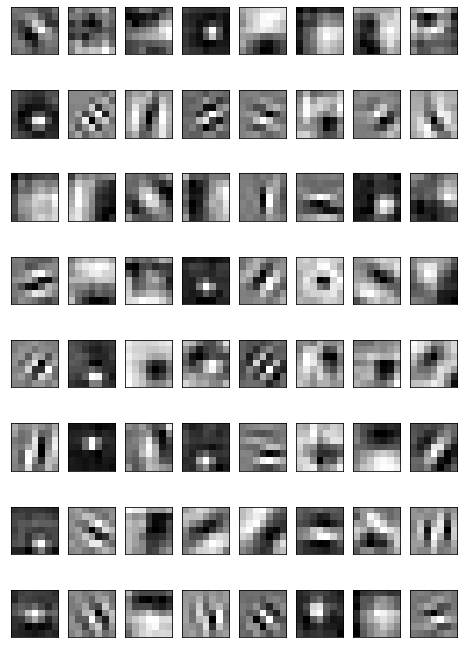

In [75]:
fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()  

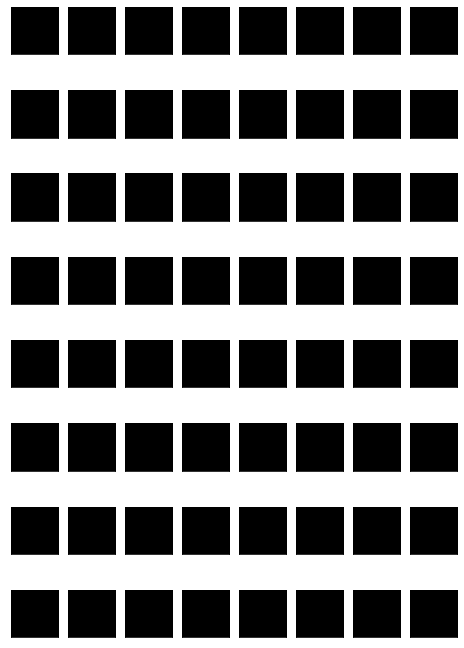

In [76]:
filters, biases = model.layers[7].get_weights()
fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray')
    #ix += 1
plt.show()  

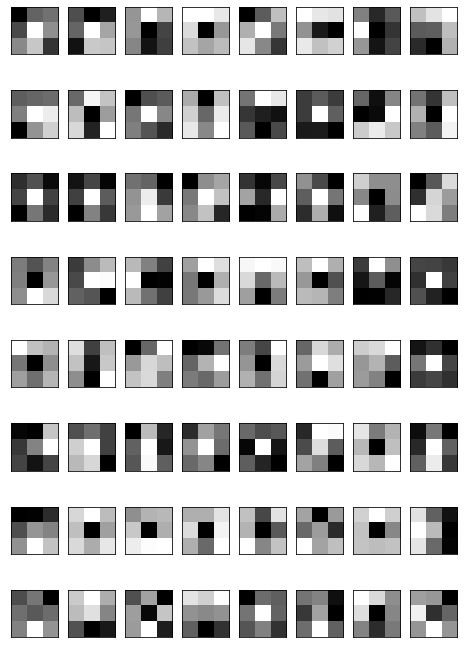

In [52]:
filters, biases = model.layers[10].get_weights()
fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray')
    #ix += 1
plt.show() 

In [84]:
from keras.models import Model
from keras.preprocessing.image import img_to_array

In [100]:
conv_layer_index = [2, 7, 10,13,14,19,22,25,32,35]  
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 166, 166, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 80, 80, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 80, 80, 64)   256         ['conv1_conv[0][0]']       

In [101]:
image=images[0]
image.shape

TensorShape([160, 160, 3])

In [102]:
img=np.resize(img,(1,IMG_SIZE,IMG_SIZE,3))
img.shape

(1, 160, 160, 3)

In [103]:
feature_output=model_short.predict(img)

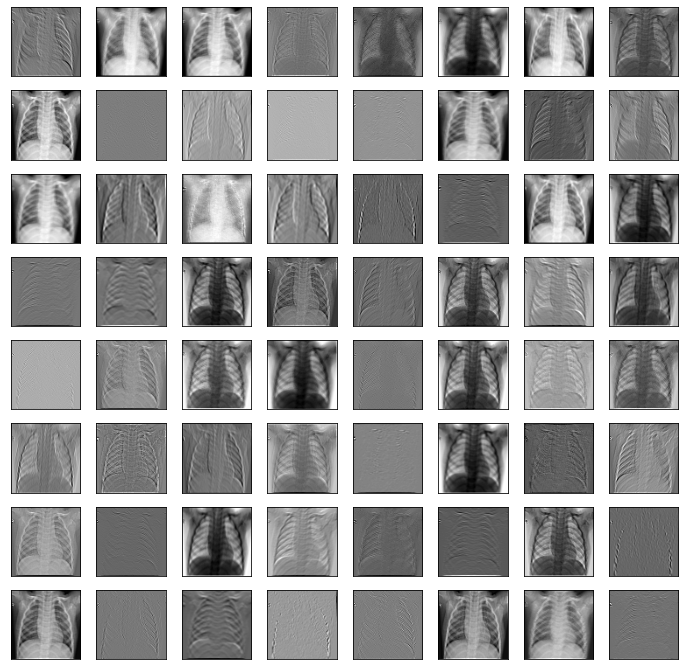

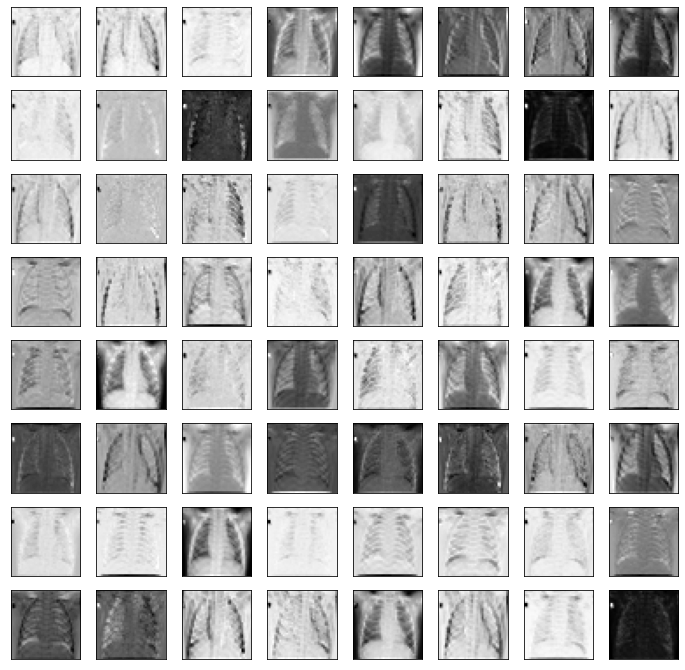

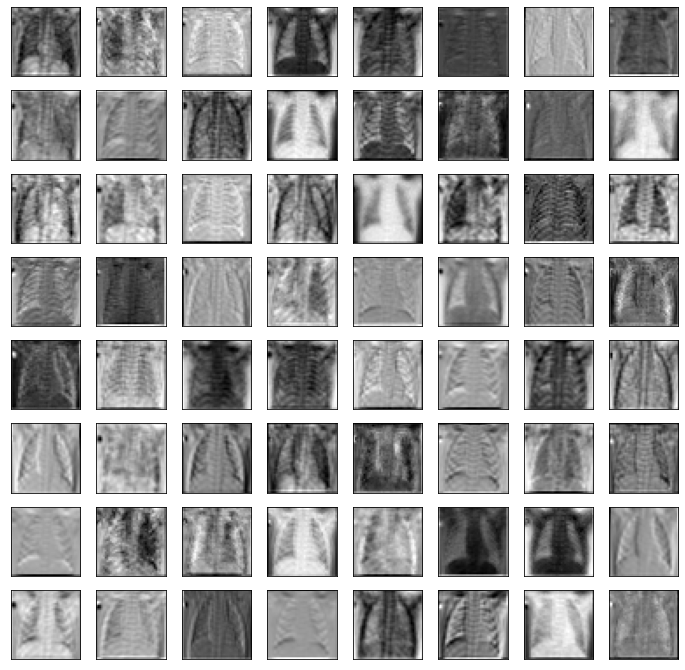

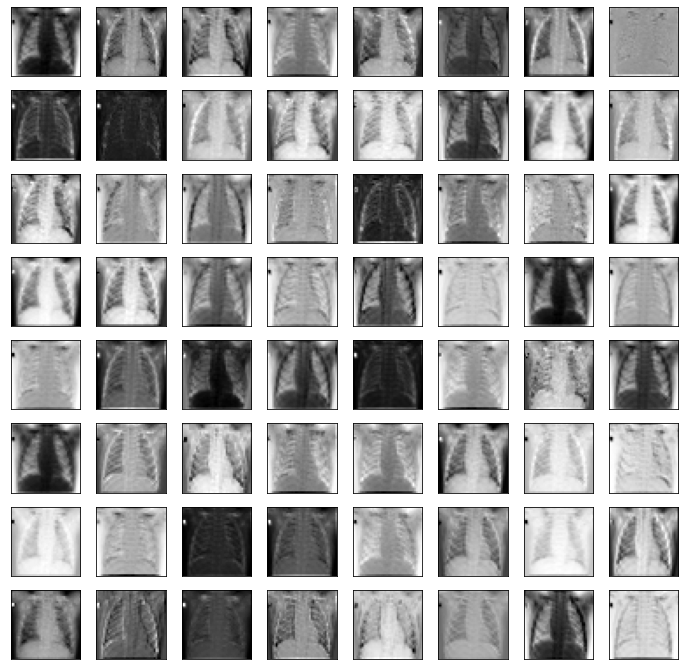

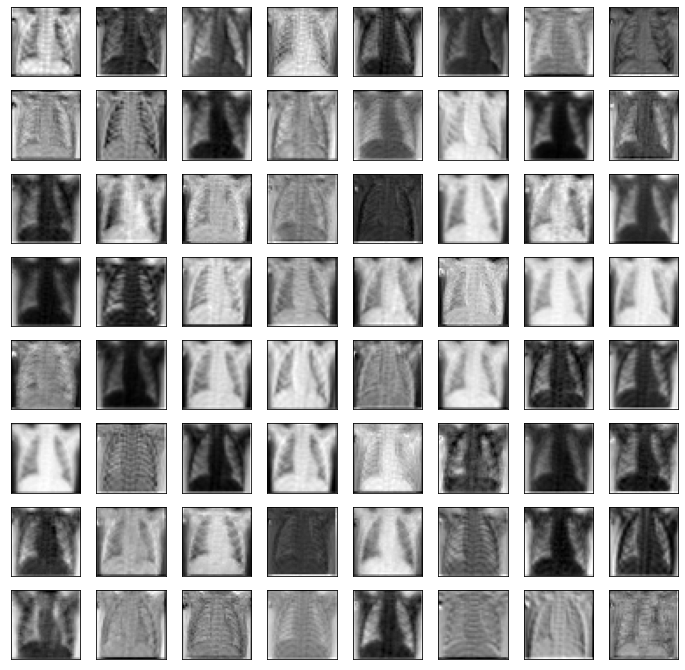

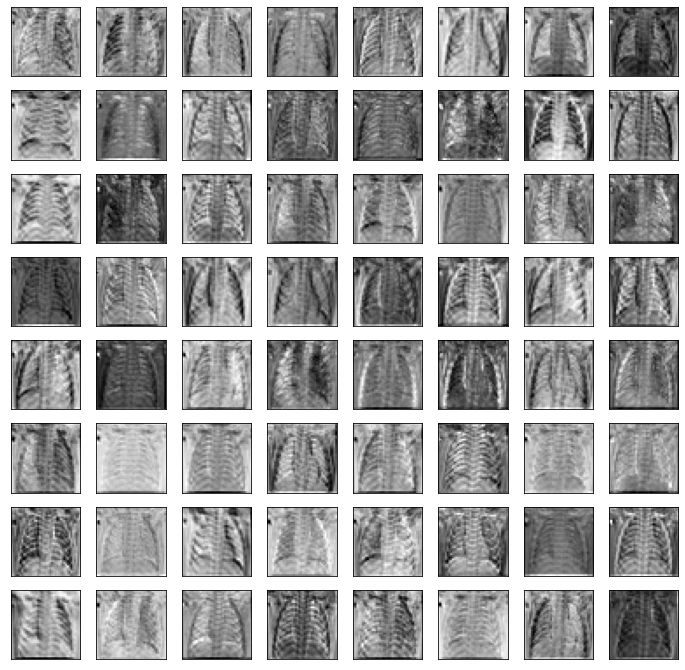

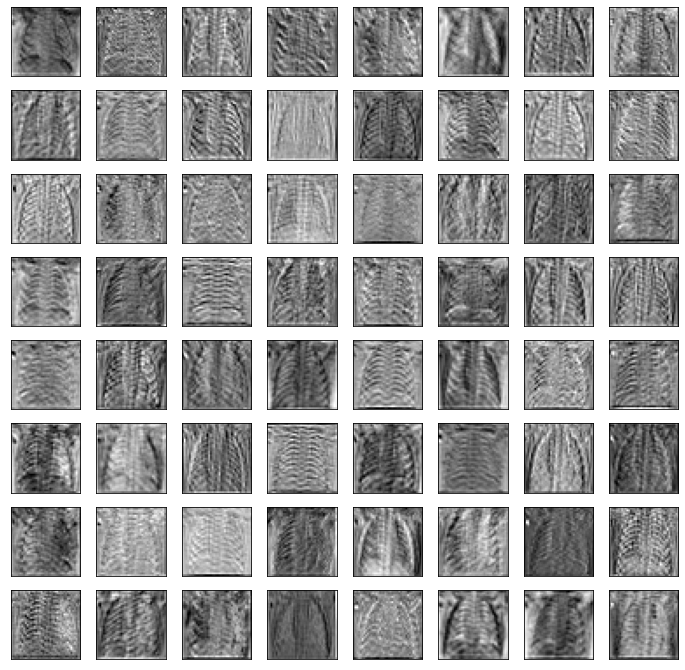

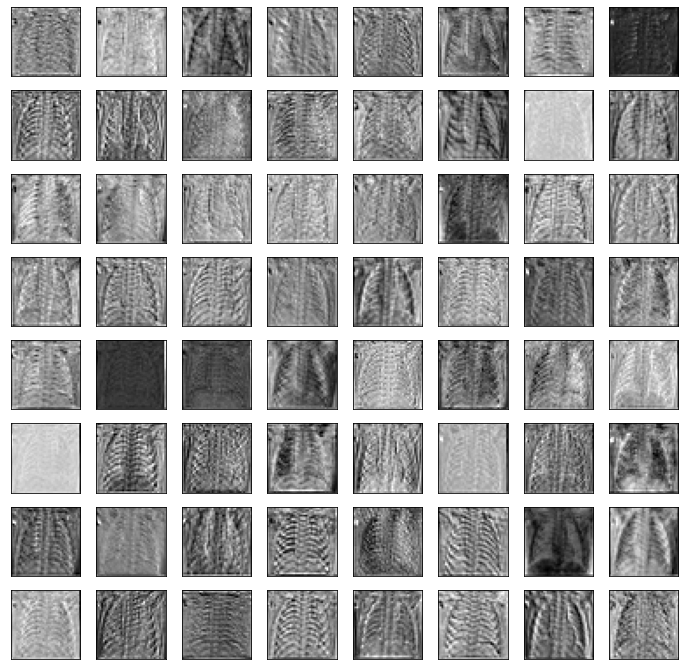

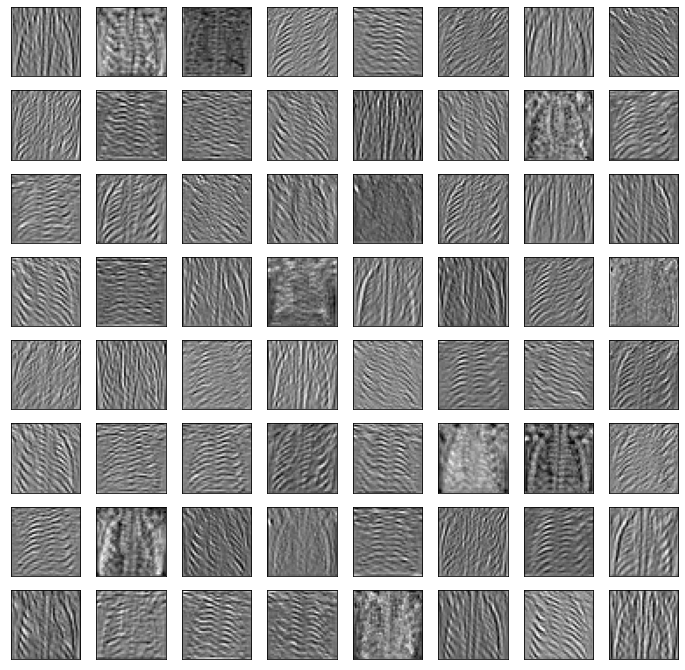

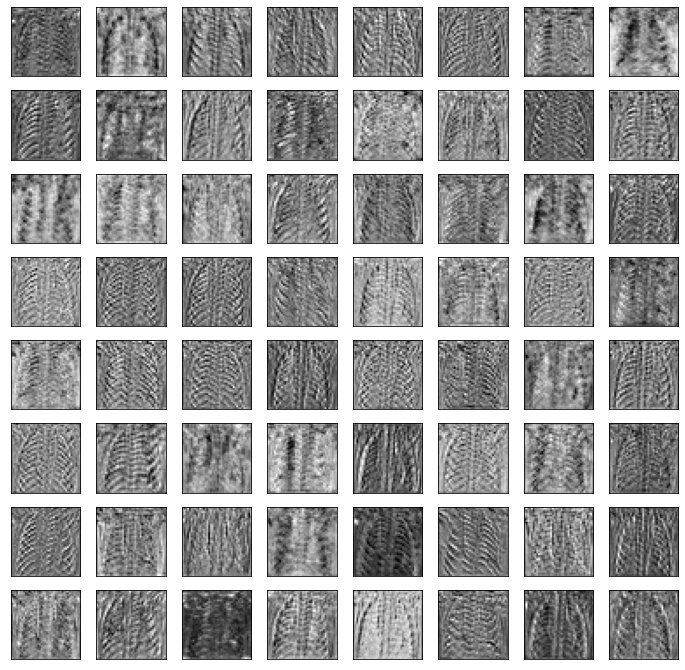

In [108]:
columns = 8
rows = 8
for ftr in feature_output:
    #pos = 1
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    plt.show()